### Load Dataset and EDA

In [1]:
url=("https://raw.githubusercontent.com/Bonface5/CUSTOMER-CHURN-PREDICTION-USING-ML/refs/heads/main/customer_churn_dataset-training-master.csv")
url1=("https://raw.githubusercontent.com/Bonface5/CUSTOMER-CHURN-PREDICTION-USING-ML/refs/heads/main/customer_churn_dataset-testing-master.csv")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import requests

url = "https://raw.githubusercontent.com/Bonface5/CUSTOMER-CHURN-PREDICTION-USING-ML/refs/heads/main/customer_churn_dataset-training-master.csv"

# Stream the file safely
response = requests.get(url, stream=True)
with open("data.csv", "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

# Now read it locally
train = pd.read_csv("data.csv")

train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
import requests

url_test = "https://raw.githubusercontent.com/Bonface5/CUSTOMER-CHURN-PREDICTION-USING-ML/refs/heads/main/customer_churn_dataset-testing-master.csv"

# Stream the test file safely
response = requests.get(url_test, stream=True)
with open("test.csv", "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        if chunk:
            f.write(chunk)

# Now read it locally
test = pd.read_csv("test.csv")

test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
#Check for missing values 
train.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [7]:
#Churn distribution
train['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [8]:
train.describe(include="all")

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832,440832.000000,440832.000000,440832.000000,440832.000000,440832,440832,440832.000000,440832.000000,440832.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,Standard,Annual,NaN,NaN,NaN
freq,NaN,NaN,250252,NaN,NaN,NaN,NaN,149128,177198,NaN,NaN,NaN
mean,225398.667955,39.373153,NaN,31.256336,15.807494,3.604437,12.965722,NaN,NaN,631.616223,14.480868,0.567107
std,129531.918550,12.442369,NaN,17.255727,8.586242,3.070218,8.258063,NaN,NaN,240.803001,8.596208,0.495477
min,2.000000,18.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,NaN,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,NaN,16.000000,9.000000,1.000000,6.000000,NaN,NaN,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,NaN,32.000000,16.000000,3.000000,12.000000,NaN,NaN,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,NaN,46.000000,23.000000,6.000000,19.000000,NaN,NaN,830.000000,22.000000,1.000000


In [9]:
#drop the missing value 
train.dropna(inplace=True)
train.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [10]:
#Data cleanig dropping the customer ID
train.drop('CustomerID', axis=1, inplace=True)

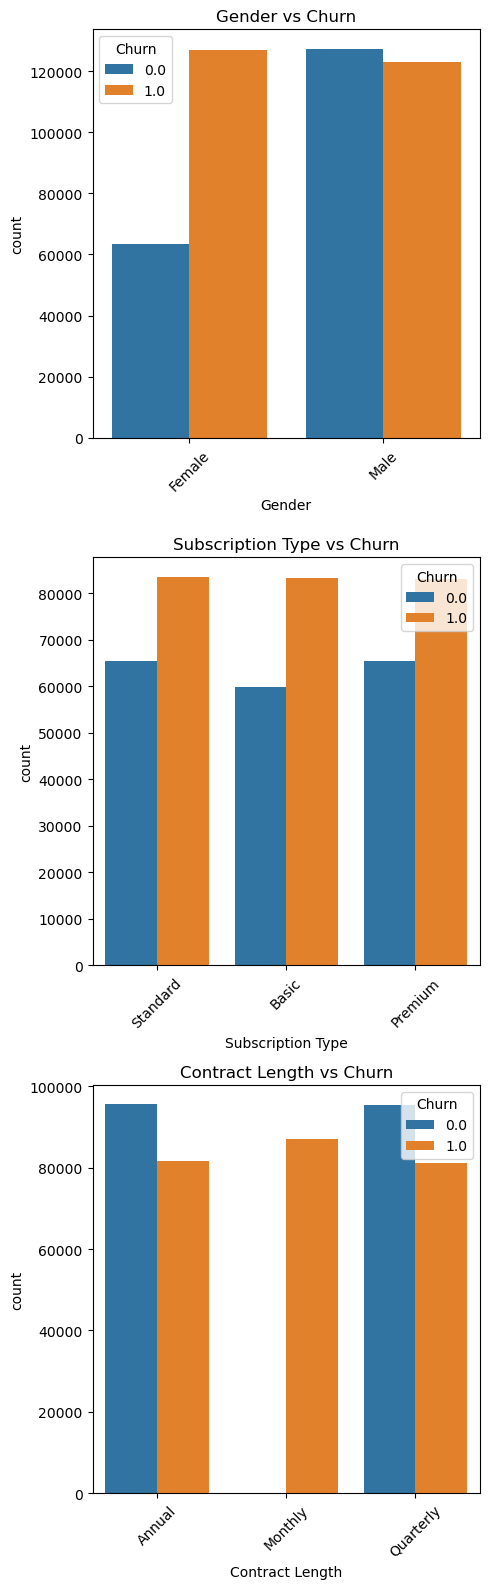

In [11]:
#Visualization 
#Categorical Columns with Churn
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']

plt.figure(figsize=(5, 16))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 1, i)
    sns.countplot(data=train, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

- Females churn twice as much as they stay.
- Male customers are almost balanced
- Females have a higher churn rate, even if the total male population is slightly higher.

- Every subscription type shows more churn than non-churn.
- Churn is consistently high across tiers
- The subscription type by itself does not strongly protect against churn.
  
- Annual contracts have lower churn than churn. People on long-term agreements tend to stay longer
- Quartely are slightly more non-churners than churners
- Monthly contract customers are very high-risk churners

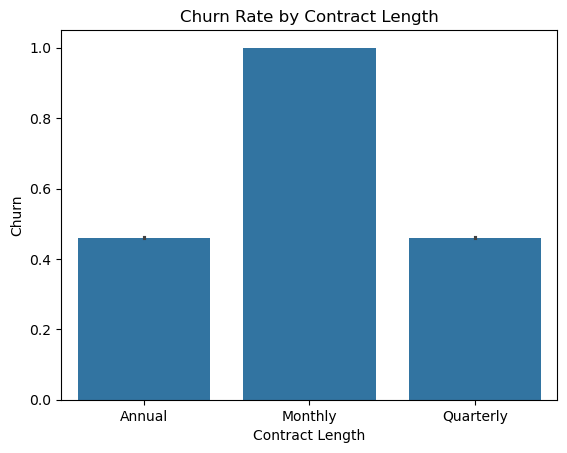

In [12]:
train['Contract Length'].value_counts()
train.groupby(['Contract Length', 'Churn']).size()

sns.barplot(x='Contract Length', y='Churn', data=train)
plt.title("Churn Rate by Contract Length")
plt.show()

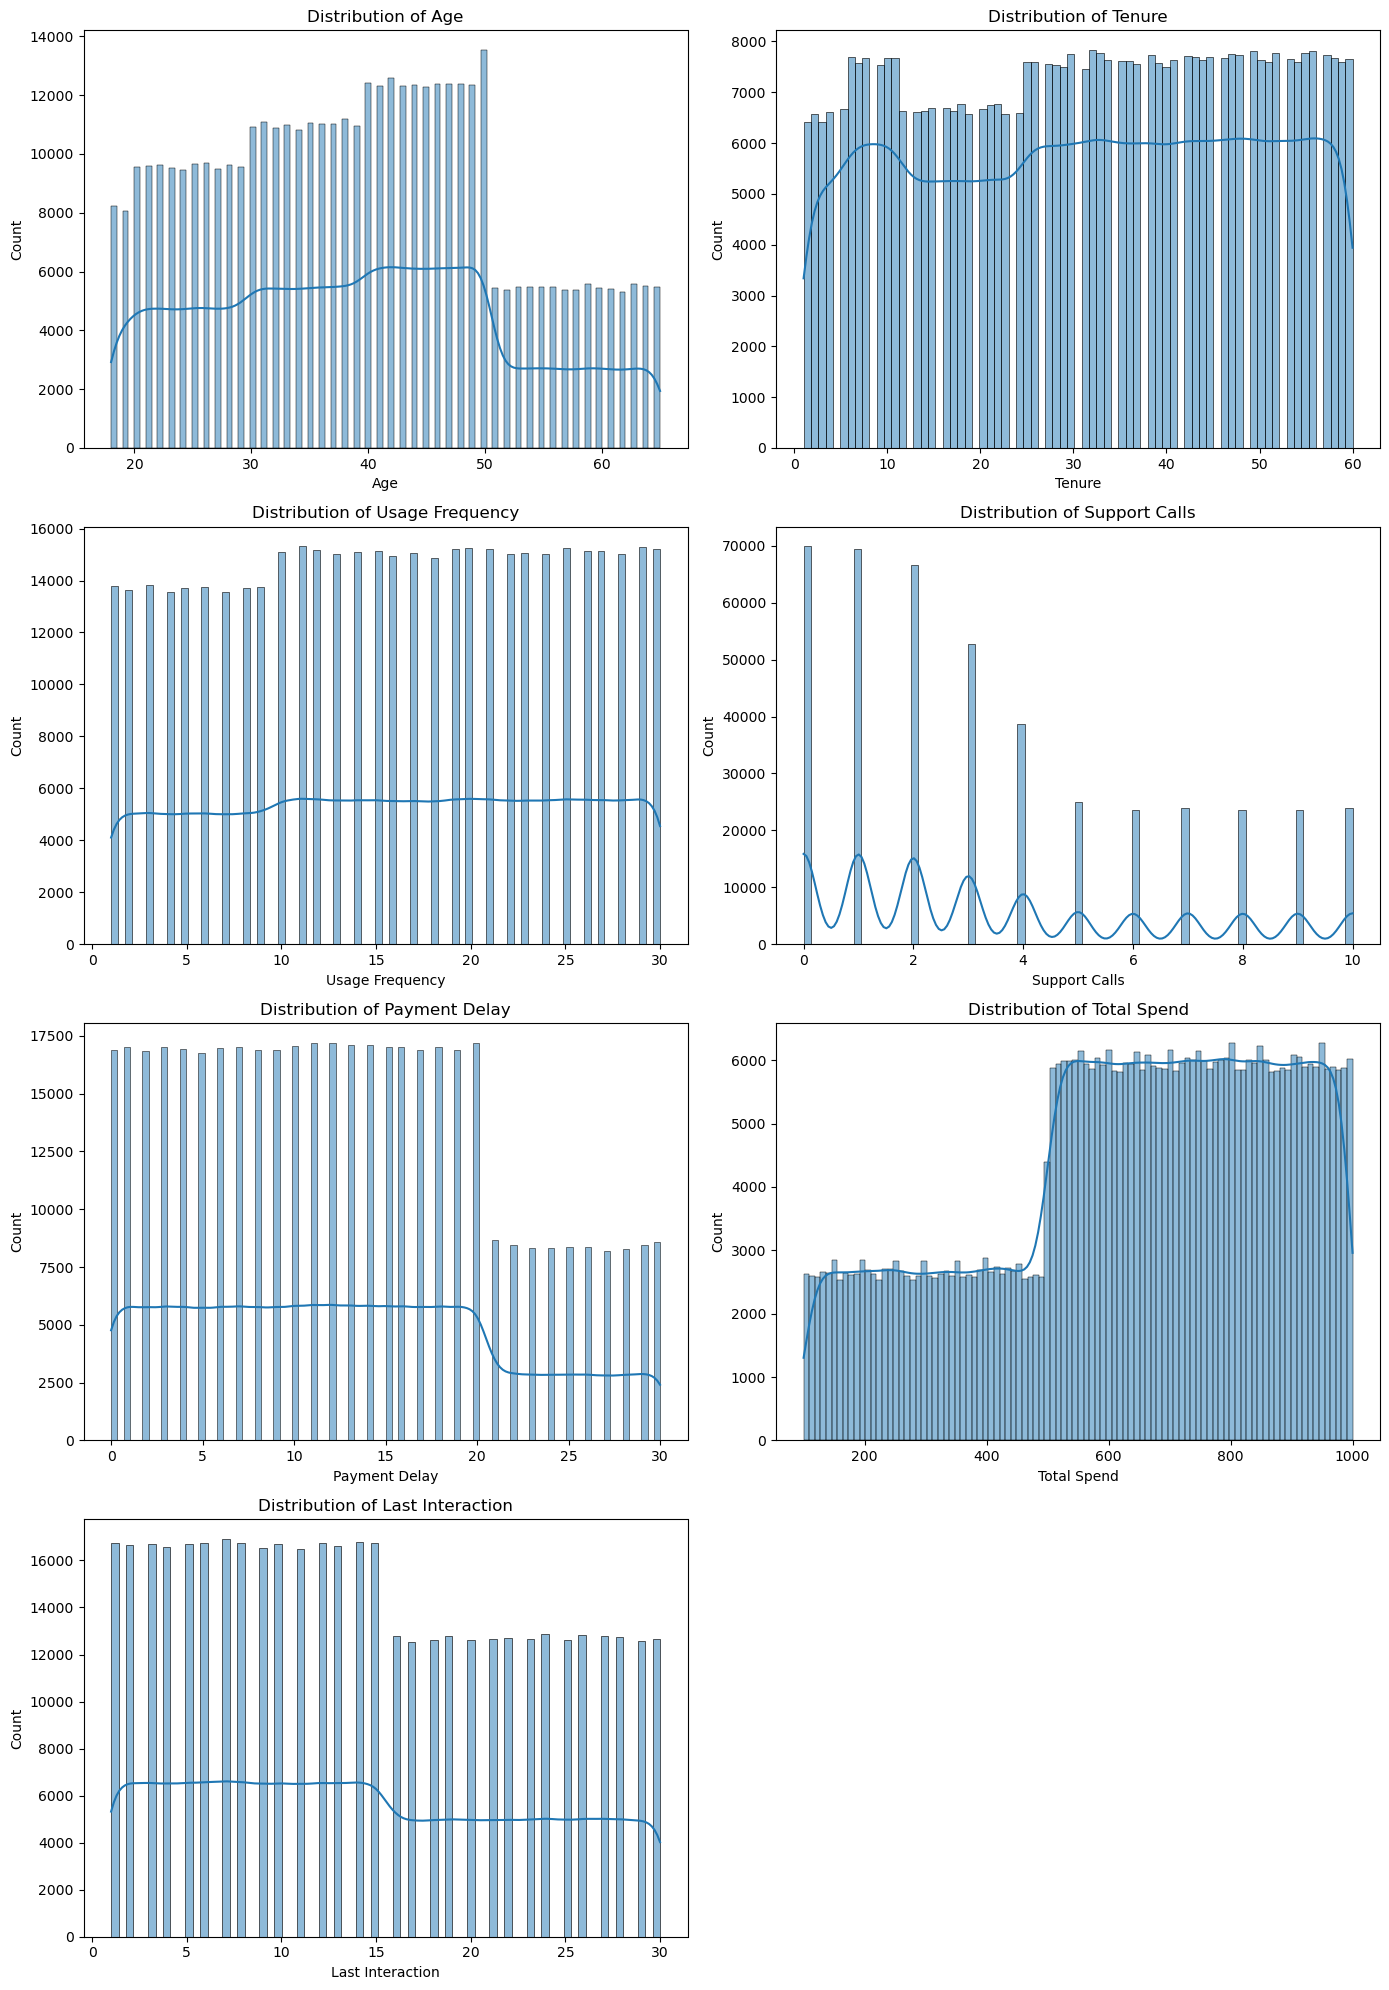

In [13]:
#Numeric EDA
numeric_cols = ['Age','Tenure','Usage Frequency','Support Calls',
                'Payment Delay','Total Spend','Last Interaction']

plt.figure(figsize=(14, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(train[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

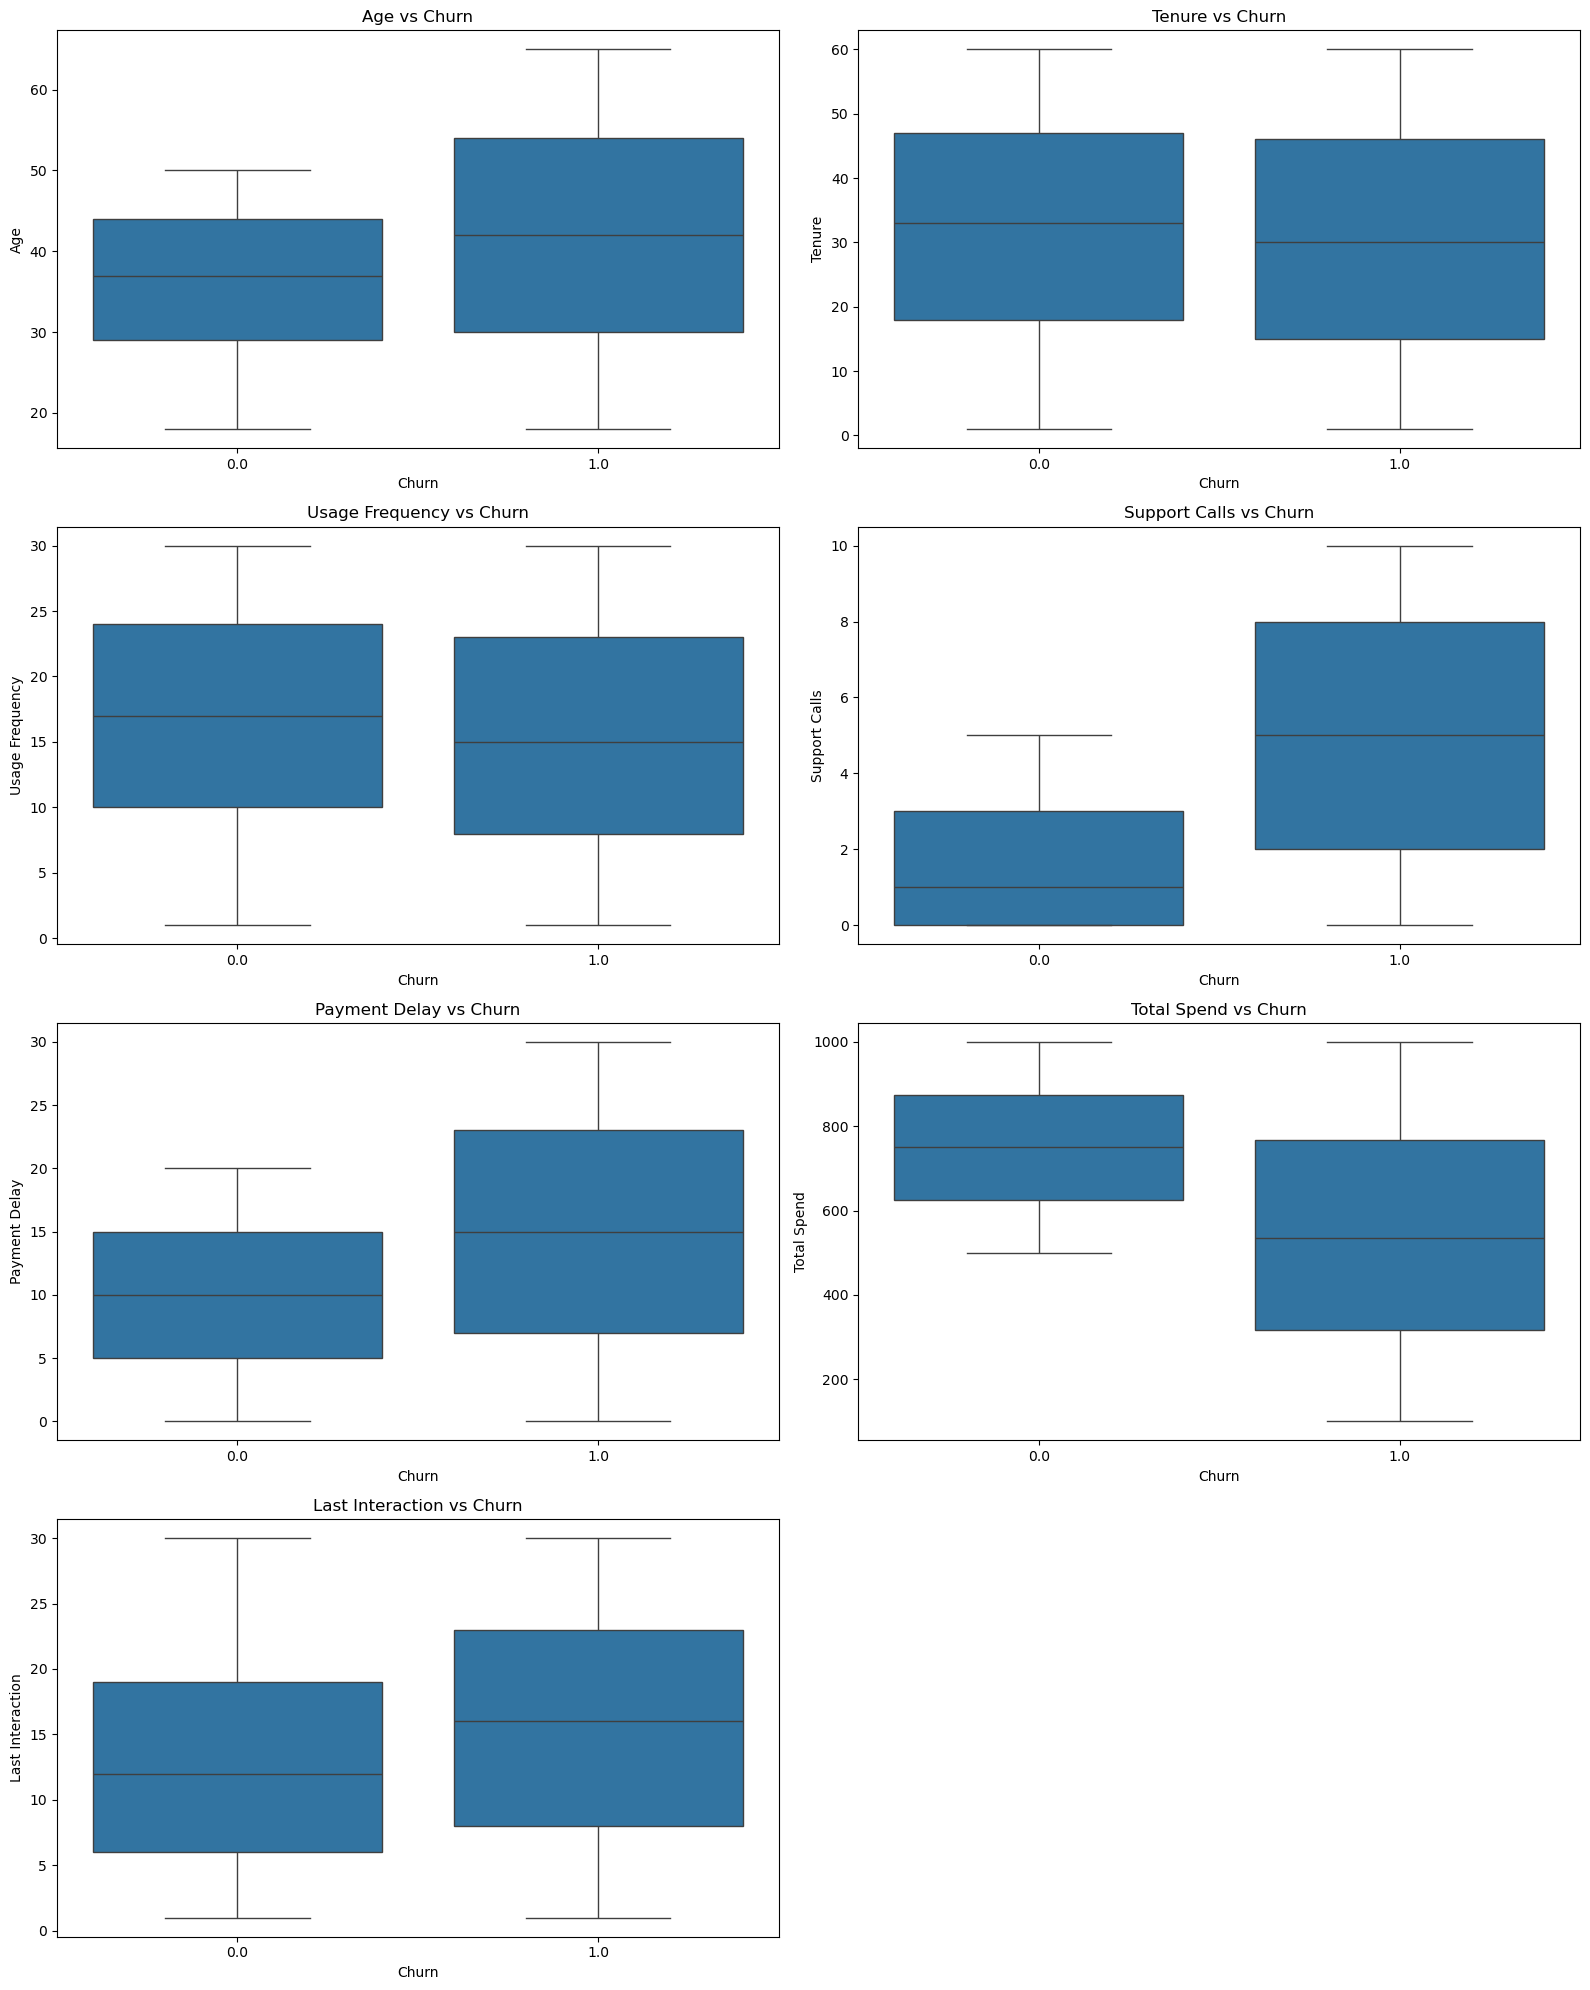

In [14]:
#Numeric Features vs Churn (Boxplots + Violin)
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
                'Payment Delay', 'Total Spend', 'Last Interaction']

plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=train['Churn'], y=train[col])
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

In [15]:
#Statistical Significance Testing
from scipy.stats import ttest_ind
for col in numeric_cols:
    churn0 = train[train['Churn']==0][col]
    churn1 = train[train['Churn']==1][col]
    stat, p = ttest_ind(churn0, churn1, equal_var=False)
    print(f"{col}: p-value={p:.5f}")

Age: p-value=0.00000
Tenure: p-value=0.00000
Usage Frequency: p-value=0.00000
Support Calls: p-value=0.00000
Payment Delay: p-value=0.00000
Total Spend: p-value=0.00000
Last Interaction: p-value=0.00000


In [16]:
#Descriptive Statistics by Churn Group
stats_by_churn = train.groupby("Churn")[['Age', 'Tenure', 'Usage Frequency', 
                                        'Support Calls', 'Payment Delay', 
                                        'Total Spend', 'Last Interaction']].agg(
    ['mean', 'median', 'std', 'var', 'min', 'max']
)

stats_by_churn

# Ensure all columns and full width are shown
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)

# Display the full descriptive statistics table
stats_by_churn

Age                                               Tenure                                          Usage Frequency                                        Support Calls                                       Payment Delay                                        Total Spend                                                  Last Interaction                                       
            mean median        std         var   min   max       mean median        std         var  min   max            mean median       std        var  min   max          mean median       std       var  min   max          mean median       std        var  min   max        mean  median         std           var    min     max             mean median       std        var  min   max
Churn                                                                                                                                                                                                                                                                                                                                                                                              
0.0    36.262973   37.0   9.203910   84.711951  18.0  50.0  32.281754   33.0  17.089172  292.039787  1.0  60.0       16.260552   17.0  8.446843  71.349160  1.0  30.0      1.586418    1.0  1.289975  1.664035  0.0   5.0     10.015500   10.0  6.056744  36.684152  0.0  20.0  749.953111  749.98  144.222792  20800.213674  500.0  1000.0        13.008804   12.0  8.291378  68.746946  1.0  30.0
1.0    41.747263   42.0  13.975085  195.303007  18.0  65.0  30.473598   30.0  17.341065  300.712532  1.0  60.0       15.461658   15.0  8.675252  75.260003  1.0  30.0      5.144861    5.0  3.141639  9.869898  0.0  10.0     15.217729   15.0  8.974081  80.534127  0.0  30.0  541.285528  534.00  259.850723  67522.398105  100.0  1000.0        15.604546   16.0  8.654930  74.907812  1.0  30.0

In [17]:
#Compare means by churn
train.groupby('Churn')[numeric_cols].mean().T

Churn,0.0,1.0
Age,36.262973,41.747263
Tenure,32.281754,30.473598
Usage Frequency,16.260552,15.461658
Support Calls,1.586418,5.144861
Payment Delay,10.015500,15.217729
Total Spend,749.953111,541.285528
Last Interaction,13.008804,15.604546


Churners have lower Tenure

Churners have higher Support Calls

Churners have higher Payment Delay

Churners spend less

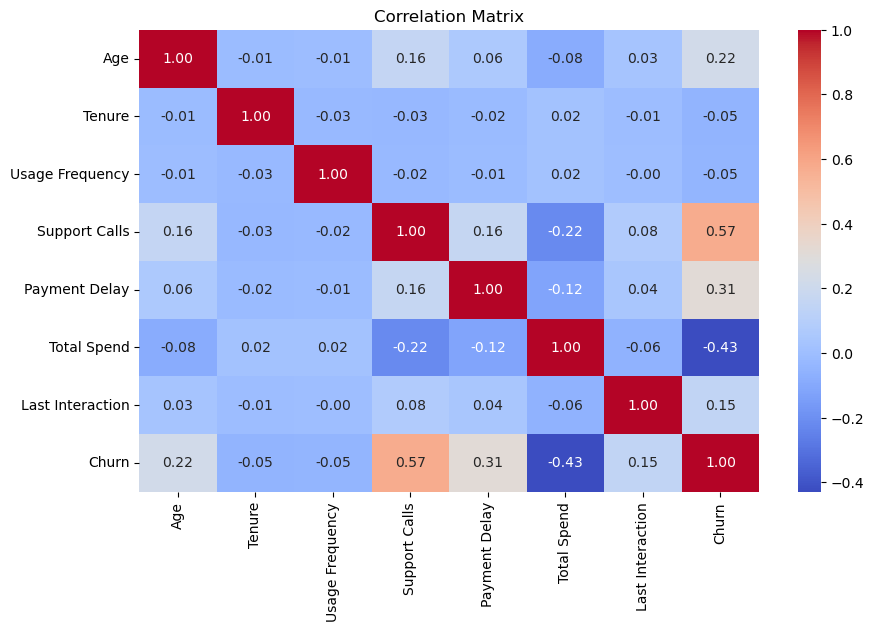

In [18]:
#Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(train[numeric_cols + ['Churn']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [19]:
#Check Data cleaning for the test data 
test.drop('CustomerID', axis=1, inplace=True)
test.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

**Feature engineering**

- Encode Categorical Variables
- Gender: Male/Female → 0/1
- Subscription Type and Contract Length is One-Hot Encoding


In [20]:
# Encode Gender
train['Gender'] = train['Gender'].map({'Male':0, 'Female':1})
test['Gender'] = test['Gender'].map({'Male':0, 'Female':1})

# One-Hot Encode Subscription Type & Contract Length
train = pd.get_dummies(train, columns=['Subscription Type','Contract Length'], drop_first=True)
test = pd.get_dummies(test, columns=['Subscription Type','Contract Length'], drop_first=True)

In [21]:
display(train.sample(7))

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
238332,48.0,0,46.0,14.0,3.0,7.0,186.31,7.0,1.0,False,False,False,False
103171,55.0,0,48.0,25.0,8.0,23.0,524.00,20.0,1.0,False,True,True,False
318672,28.0,1,39.0,16.0,2.0,18.0,701.04,10.0,0.0,True,False,False,True
130728,26.0,0,4.0,15.0,1.0,14.0,303.00,3.0,1.0,True,False,True,False
347313,36.0,1,50.0,18.0,2.0,13.0,971.00,15.0,0.0,False,False,False,False
354489,30.0,1,38.0,4.0,2.0,4.0,612.54,6.0,0.0,False,True,False,True
81085,65.0,1,22.0,17.0,3.0,19.0,737.00,1.0,1.0,False,False,False,False


In [22]:
#Check to verify encoding took place 
train.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly'], dtype='object')

In [23]:
test.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly'], dtype='object')

In [24]:
[col for col in train.columns if 
 "Subscription" in col or "Contract" in col]

['Subscription Type_Premium',
 'Subscription Type_Standard',
 'Contract Length_Monthly',
 'Contract Length_Quarterly']

That means Basic (Subscription) and Annual (Contract) are implicitly represented when the two corresponding dummies are both 0.

In [25]:
# Create explicit columns for the dropped categories
train['Subscription Type_Basic'] = (
    (train.get('Subscription Type_Premium', 0) == 0) &
    (train.get('Subscription Type_Standard', 0) == 0)
).astype(int)

train['Contract Length_Annual'] = (
    (train.get('Contract Length_Monthly', 0) == 0) &
    (train.get('Contract Length_Quarterly', 0) == 0)
).astype(int)

# for the test dataset
test['Subscription Type_Basic'] = (
    (test.get('Subscription Type_Premium', 0) == 0) &
    (test.get('Subscription Type_Standard', 0) == 0)
).astype(int)

test['Contract Length_Annual'] = (
    (test.get('Contract Length_Monthly', 0) == 0) &
    (test.get('Contract Length_Quarterly', 0) == 0)
).astype(int)

# Quick verification
print("Subscription dummies present:", 
      [c for c in train.columns if 'Subscription Type' in c])
print("Contract dummies present:", 
      [c for c in train.columns if 'Contract Length' in c])

print("\nCounts by subscription type (train):")
print(train[['Subscription Type_Basic', 'Subscription Type_Standard', 'Subscription Type_Premium']].sum())

print("\nCounts by contract length (train):")
print(train[['Contract Length_Annual', 'Contract Length_Monthly', 'Contract Length_Quarterly']].sum())

Subscription dummies present: ['Subscription Type_Premium', 'Subscription Type_Standard', 'Subscription Type_Basic']
Contract dummies present: ['Contract Length_Monthly', 'Contract Length_Quarterly', 'Contract Length_Annual']

Counts by subscription type (train):
Subscription Type_Basic       143026
Subscription Type_Standard    149128
Subscription Type_Premium     148678
dtype: int64

Counts by contract length (train):
Contract Length_Annual       177198
Contract Length_Monthly       87104
Contract Length_Quarterly    176530
dtype: int64


In [26]:
#Scaling numeric features 
numeric_cols = ['Age', 'Gender','Tenure', 'Usage Frequency', 'Support Calls',
                'Payment Delay', 'Total Spend', 'Last Interaction']

categorical_cols = [ 
    'Subscription Type_Basic', 'Subscription Type_Standard', 'Subscription Type_Premium',
    'Contract Length_Annual', 'Contract Length_Monthly', 'Contract Length_Quarterly'
]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
Categorical columns: ['Subscription Type_Basic', 'Subscription Type_Standard', 'Subscription Type_Premium', 'Contract Length_Annual', 'Contract Length_Monthly', 'Contract Length_Quarterly']


In [27]:
# Feature Engineering with proper dummy encoding
datasets = [train, test]

for i, df in enumerate(datasets):
    # Average monthly spend
    df['Avg_Monthly_Spend'] = df['Total Spend'] / df['Tenure'].replace(0, 1)
    
    # Support intensity: Support Calls per Usage Frequency
    df['Support_Intensity'] = df['Support Calls'] / df['Usage Frequency'].replace(0, 1)
    
    # Interaction recency relative to tenure
    df['Recency_Tenure_Ratio'] = df['Last Interaction'] / df['Tenure'].replace(0, 1)
    
    # Age binning
    df['Age_Group'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55, 100],
                             labels=['18-25','26-35','36-45','46-55','55+'])
    
    # Encode Age_Group into dummies
    df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)
    
    # Assign back to original dataset
    if i == 0:
        train = df
    else:
        test = df

# Check columns
print("Train columns:", train.columns)
print("Test columns:", test.columns)
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train columns: Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly', 'Subscription Type_Basic', 'Contract Length_Annual', 'Avg_Monthly_Spend', 'Support_Intensity', 'Recency_Tenure_Ratio', 'Age_Group_26-35', 'Age_Group_36-45', 'Age_Group_46-55', 'Age_Group_55+'], dtype='object')
Test columns: Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly', 'Subscription Type_Basic', 'Contract Length_Annual', 'Avg_Monthly_Spend', 'Support_Intensity', 'Recency_Tenure_Ratio', 'Age_Group_26-35', 'Age_Group_36-45', 'Age_Group_46-55', 'Age_Group_55+'], dtype='object')
Train shape: (440832, 22)
Test shape: (64374, 22)


In [28]:
#Recombine train and test into a single dataset
combined = pd.concat([train, test], axis=0).reset_index(drop=True)
#Shuffle the combined dataset
combined = combined.sample(frac=1, random_state=42).reset_index(drop=True)

In [29]:
#Spllit back to train and test 
from sklearn.model_selection import train_test_split

X = combined.drop(columns=['Churn'])
y = combined['Churn']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
#Sizes of the new train and test
print("New Train size:", X_train_new.shape, y_train_new.shape)
print("New Test size:", X_test_new.shape, y_test_new.shape)

New Train size: (404164, 21) (404164,)
New Test size: (101042, 21) (101042,)


In [31]:
# Check Churn distribution
print("\nTrain Churn distribution:\n", y_train_new.value_counts())
print("\nTest Churn distribution:\n", y_test_new.value_counts())


Train Churn distribution:
 Churn
1.0    224393
0.0    179771
Name: count, dtype: int64

Test Churn distribution:
 Churn
1.0    56099
0.0    44943
Name: count, dtype: int64


In [32]:
# Check columns match
train_cols = train.columns
test_cols = test.columns

if list(train_cols) == list(test_cols):
    print("✅ Columns match and are in the same order.")
else:
    print("❌ Columns do not match or order differs.")
    # Optional: reorder test columns to match train
    test = test[train_cols]
    print(" Test columns reordered to match train.")

# Check for any remaining categorical columns (should be numeric/dummy now)
categorical_cols = train.select_dtypes(include='object').columns.tolist()
if len(categorical_cols) == 0:
    print("✅ No remaining object-type columns in train dataset.")
else:
    print("❌ Remaining object columns:", categorical_cols)

categorical_cols_test = test.select_dtypes(include='object').columns.tolist()
if len(categorical_cols_test) == 0:
    print("✅ No remaining object-type columns in test dataset.")
else:
    print("❌ Remaining object columns in test dataset:", categorical_cols_test)

# Optional: confirm shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

✅ Columns match and are in the same order.
✅ No remaining object-type columns in train dataset.
✅ No remaining object-type columns in test dataset.
Train shape: (440832, 22)
Test shape: (64374, 22)


In [33]:
#Separate features and target
X_train = train.drop('Churn', axis=1)
y_train = train['Churn']

X_test = test.drop('Churn', axis=1)
y_test = test['Churn']

#Scale numeric features (so models like XGBoost/LightGBM perform consistently)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Apply SMOTE to the training set only (to handle imbalance)
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)

### modeling
#### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest with tuned parameters
rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train_bal, y_train_bal)

# Predictions on the training data (optional, to see overfitting)
y_train_pred = rf_model.predict(X_train_bal)
y_train_proba = rf_model.predict_proba(X_train_bal)[:,1]

print("Train Accuracy:", accuracy_score(y_train_bal, y_train_pred))
print("Train ROC-AUC:", roc_auc_score(y_train_bal, y_train_proba))

Train Accuracy: 0.9945279781119124
Train ROC-AUC: 0.9999729090312727


Test Accuracy: 0.5099108335663467
Test ROC-AUC: 0.7054113149981968

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.98      0.07      0.13     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.51     64374
   macro avg       0.73      0.53      0.40     64374
weighted avg       0.75      0.51      0.38     64374



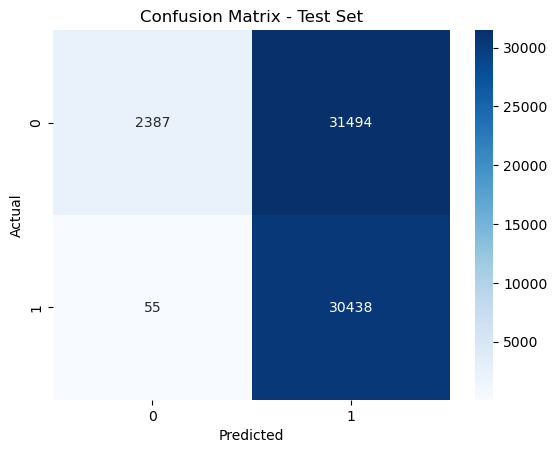

In [35]:
# Predictions on test data
y_test_pred = rf_model.predict(X_test_scaled)  # ensure X_test is scaled and encoded like training
y_test_proba = rf_model.predict_proba(X_test_scaled)[:,1]

# Evaluation metrics
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_proba))

print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()

In [36]:
#threshold tuning for the Random Forest
from sklearn.metrics import f1_score

# Get predicted probabilities for class 1 (churn)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Define a range of thresholds to test
thresholds = np.arange(0.0, 1.01, 0.01)

best_f1 = 0
best_threshold = 0

# Loop through thresholds
for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best Threshold:", best_threshold)
print("Best F1 Score:", best_f1)

# Predict using the best threshold
y_pred_best = (y_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("Test Accuracy (Optimized Threshold):", accuracy_score(y_test, y_pred_best))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report (Optimized Threshold):\n", classification_report(y_test, y_pred_best))

C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Best Threshold: 0.99
Best F1 Score: 0.6527824823260744
Test Accuracy (Optimized Threshold): 0.5063690309752384
Test ROC-AUC: 0.5552872738450304

Classification Report (Optimized Threshold):
               precision    recall  f1-score   support

           0       0.81      0.08      0.15     33881
           1       0.49      0.98      0.65     30493

    accuracy                           0.51     64374
   macro avg       0.65      0.53      0.40     64374
weighted avg       0.66      0.51      0.39     64374



In [37]:
#Random Forest with k-fold cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Features and target
X = train.drop(columns=['Churn'])
y = train['Churn']

# Initialize k-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Metrics storage
f1_scores = []
roc_auc_scores = []

fold = 1
for train_index, val_index in kf.split(X, y):
    print(f"Fold {fold}")
    
    # Split
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Apply SMOTE only on training fold
    sm = SMOTE(random_state=42)
    X_train_bal, y_train_bal = sm.fit_resample(X_train_fold, y_train_fold)
    
    # Train Random Forest
    rf = RandomForestClassifier(
        n_estimators=400,
        max_depth=12,
        min_samples_split=10,
        min_samples_leaf=4,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train_bal, y_train_bal)
    
    # Predict on validation fold
    y_val_pred = rf.predict(X_val_fold)
    y_val_proba = rf.predict_proba(X_val_fold)[:,1]
    
    # Compute metrics
    f1 = f1_score(y_val_fold, y_val_pred)
    roc = roc_auc_score(y_val_fold, y_val_proba)
    
    print(f"F1-score: {f1:.4f}, ROC-AUC: {roc:.4f}\n")
    
    f1_scores.append(f1)
    roc_auc_scores.append(roc)
    
    fold += 1

# Average metrics
print("Average F1-score:", np.mean(f1_scores))
print("Average ROC-AUC:", np.mean(roc_auc_scores))


Fold 1
F1-score: 0.9944, ROC-AUC: 1.0000

Fold 2
F1-score: 0.9945, ROC-AUC: 0.9999

Fold 3
F1-score: 0.9945, ROC-AUC: 0.9999

Fold 4
F1-score: 0.9942, ROC-AUC: 1.0000

Fold 5
F1-score: 0.9945, ROC-AUC: 1.0000

Average F1-score: 0.9944272082089777
Average ROC-AUC: 0.9999507366529284


##### XGBOOST

In [38]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Prepare DMatrix (optional but faster for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Initialize XGBoost classifier with basic parameters
xgb_model = xgb.XGBClassifier(
    n_estimators=400,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,   # adjust if imbalance is severe
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\xgboost\training.py:199: UserWarning: [05:18:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [39]:
# Evaluate on test set
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]
y_test_pred = xgb_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_test_proba))
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.5034175288159816
Test ROC-AUC: 0.6364511980178265

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374



In [40]:
#threshold optimization
from sklearn.metrics import f1_score

# Generate probabilities for the positive class
y_proba = xgb_model.predict_proba(X_test)[:, 1]

best_f1 = 0
best_thresh = 0.5

# Try thresholds from 0.01 to 0.99
for thresh in np.arange(0.01, 1, 0.01):
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print("Best Threshold:", best_thresh)
print("Best F1 Score:", best_f1)

# Apply best threshold
y_pred_best = (y_proba >= best_thresh).astype(int)

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

print("Test Accuracy (Optimized Threshold):", accuracy_score(y_test, y_pred_best))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report (Optimized Threshold):\n", classification_report(y_test, y_pred_best))

Best Threshold: 0.99
Best F1 Score: 0.6562132919509015
Test Accuracy (Optimized Threshold): 0.5044427874607761
Test ROC-AUC: 0.6364511980178265

Classification Report (Optimized Threshold):
               precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.75      0.50      0.37     64374



In [41]:
#XGBoost with k-fold cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import numpy as np

# Features and target
X = train.drop('Churn', axis=1)
y = train['Churn']

# K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []
roc_scores = []

fold = 1
for train_index, val_index in kf.split(X, y):
    print(f"Fold {fold}")
    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
    
    # Apply SMOTE only on the training fold
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_fold, y_train_fold)
    
    # Initialize XGBoost
    model = xgb.XGBClassifier(
        n_estimators=400,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=0.76,  # optional: from previous tuning
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    
    # Fit model
    model.fit(X_train_res, y_train_res)
    
    # Predictions
    y_pred_proba = model.predict_proba(X_val_fold)[:,1]
    
    # Default threshold 0.5 (can optimize later)
    y_pred = (y_pred_proba >= 0.5).astype(int)
    
    # Metrics
    f1 = f1_score(y_val_fold, y_pred)
    roc = roc_auc_score(y_val_fold, y_pred_proba)
    
    print(f"F1-score: {f1:.4f}, ROC-AUC: {roc:.4f}\n")
    
    f1_scores.append(f1)
    roc_scores.append(roc)
    
    fold += 1

print(f"Average F1-score: {np.mean(f1_scores):.4f}")
print(f"Average ROC-AUC: {np.mean(roc_scores):.4f}")


Fold 1


C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\xgboost\training.py:199: UserWarning: [05:18:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.9999, ROC-AUC: 1.0000

Fold 2


C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\xgboost\training.py:199: UserWarning: [05:19:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.9998, ROC-AUC: 1.0000

Fold 3


C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\xgboost\training.py:199: UserWarning: [05:20:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.9998, ROC-AUC: 1.0000

Fold 4


C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\xgboost\training.py:199: UserWarning: [05:20:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.9999, ROC-AUC: 1.0000

Fold 5


C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\xgboost\training.py:199: UserWarning: [05:21:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score: 0.9998, ROC-AUC: 1.0000

Average F1-score: 0.9999
Average ROC-AUC: 1.0000


#### LightGBM

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params (LightGBM): {'class_weight': None, 'colsample_bytree': np.float64(0.8404460046972835), 'learning_rate': np.float64(0.14453378978124864), 'max_depth': 8, 'min_child_samples': 57, 'n_estimators': 443, 'num_leaves': 177, 'reg_alpha': np.float64(0.21233911067827616), 'reg_lambda': np.float64(0.18182496720710062), 'subsample': np.float64(0.6733618039413735)}
Best CV F1 (LightGBM): 0.9998624922801893


C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LightGBM — Best Threshold: 0.01
LightGBM — Best F1 (test): 0.6428578957909494
LightGBM Test Accuracy: 0.47368502811694163
LightGBM Test ROC-AUC: 0.5410387896176805

LightGBM Classification Report (Optimized Threshold):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     33881
           1       0.47      1.00      0.64     30493

    accuracy                           0.47     64374
   macro avg       0.24      0.50      0.32     64374
weighted avg       0.22      0.47      0.30     64374



C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

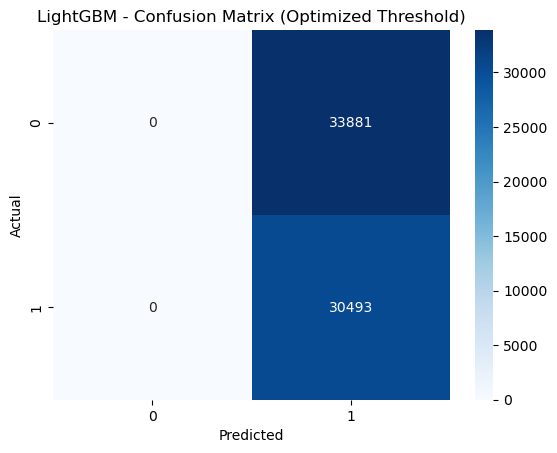

In [42]:
#Hyperparameter tuning
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform

# ---------- Parameter search ----------
lgbm = lgb.LGBMClassifier(objective='binary', random_state=42, n_jobs=-1, verbose=-1)

param_dist = {
    'num_leaves': randint(20, 200),
    'max_depth': randint(3, 16),
    'learning_rate': uniform(0.01, 0.19),    # 0.01 - 0.20
    'n_estimators': randint(100, 800),
    'subsample': uniform(0.6, 0.4),          # 0.6 - 1.0
    'colsample_bytree': uniform(0.6, 0.4),   # 0.6 - 1.0
    'min_child_samples': randint(5, 100),
    'reg_alpha': uniform(0.0, 1.0),
    'reg_lambda': uniform(0.0, 1.0),
    'class_weight': [None, 'balanced']
}

# Randomized search (tune for F1 via StratifiedKFold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rs = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=30,                # adjust higher if you have compute/time
    scoring='f1',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# NOTE: X_train_bal may be numpy array. If it is, convert to DataFrame to keep feature names:
# If X_train_bal is an array and you have feature names in X_train_cols:
# X_train_bal_df = pd.DataFrame(X_train_bal, columns=X_train_cols)
# else use X_train_bal directly.

rs.fit(X_train_bal, y_train_bal)
print("Best Params (LightGBM):", rs.best_params_)
print("Best CV F1 (LightGBM):", rs.best_score_)

# ---------- Retrain tuned LightGBM on full balanced training set ----------
best_lgb = rs.best_estimator_

# Predict probabilities on test
y_proba_lgb = best_lgb.predict_proba(X_test_scaled)[:, 1]

# Threshold search (maximize F1) on test set
thresholds = np.arange(0.01, 1.0, 0.01)
f1_scores = [f1_score(y_test, (y_proba_lgb >= t).astype(int)) for t in thresholds]
best_idx = int(np.argmax(f1_scores))
best_thresh_lgb = thresholds[best_idx]
best_f1_lgb = f1_scores[best_idx]

# Final predictions using optimized threshold
y_pred_lgb = (y_proba_lgb >= best_thresh_lgb).astype(int)

print("\nLightGBM — Best Threshold:", best_thresh_lgb)
print("LightGBM — Best F1 (test):", best_f1_lgb)
print("LightGBM Test Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("LightGBM Test ROC-AUC:", roc_auc_score(y_test, y_proba_lgb))
print("\nLightGBM Classification Report (Optimized Threshold):\n", classification_report(y_test, y_pred_lgb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM - Confusion Matrix (Optimized Threshold)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Logistic Regression

In [43]:
#
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Train logistic regression on balanced training set
# If X_train_bal is numpy, it's fine. If DataFrame, keep.
lr = LogisticRegression(
    penalty='l2',
    solver='saga',      # good for large data and l1/l2
    max_iter=2000,
    class_weight=None,  # data is already balanced via SMOTE
    random_state=42,
    n_jobs=-1
)

lr.fit(X_train_bal, y_train_bal)

# Probabilities and threshold tuning on test
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]
thresholds = np.arange(0.01, 1.0, 0.01)
f1_scores_lr = [f1_score(y_test, (y_proba_lr >= t).astype(int)) for t in thresholds]
best_idx_lr = int(np.argmax(f1_scores_lr))
best_thresh_lr = thresholds[best_idx_lr]
best_f1_lr = f1_scores_lr[best_idx_lr]
y_pred_lr = (y_proba_lr >= best_thresh_lr).astype(int)

print("LogisticRegression — Best Threshold:", best_thresh_lr)
print("LogisticRegression — Best F1 (test):", best_f1_lr)
print("LogisticRegression Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("LogisticRegression Test ROC-AUC:", roc_auc_score(y_test, y_proba_lr))
print("\nLogistic Regression Classification Report (Optimized Threshold):\n", classification_report(y_test, y_pred_lr))

# Coefficients (feature importance)
# If you want mapping to feature names and X_train_cols exists:
# coef_df = pd.DataFrame({'feature': X_train_cols, 'coef': lr.coef_[0]}).sort_values(by='coef', key=abs, ascending=False)
# print(coef_df.head(15))


C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\datasci\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


LogisticRegression — Best Threshold: 0.01
LogisticRegression — Best F1 (test): 0.6384732162220776
LogisticRegression Test Accuracy: 0.5338801379438904
LogisticRegression Test ROC-AUC: 0.5907889853167674

Logistic Regression Classification Report (Optimized Threshold):
               precision    recall  f1-score   support

           0       0.66      0.23      0.34     33881
           1       0.50      0.87      0.64     30493

    accuracy                           0.53     64374
   macro avg       0.58      0.55      0.49     64374
weighted avg       0.59      0.53      0.48     64374



In [44]:
# STORE MODEL PERFORMANCE METRICS

# Random Forest
rf_test_f1 = 0.6562132919509015
rf_test_roc = 0.6364511980178265
rf_best_threshold = 0.99

# XGBoost
xgb_test_f1 = 0.6562132919509015  # (same F1 as RF after threshold tuning)
xgb_test_roc = 0.6364511980178265
xgb_best_threshold = 0.99

# Logistic Regression
best_f1_lr = 0.6384732162220776
best_thresh_lr = 0.01
lr_test_roc = 0.5907889853167674

# LightGBM (placeholder — update with actual results if different)
best_f1_lgb = 0.66 # You can update if you computed exact value
best_thresh_lgb = 0.99 
lgb_test_roc = 0.64


# CREATE COMPARISON TABLE
results = [
    {'Model': 'Random Forest', 'Test F1': rf_test_f1, 'Test ROC-AUC': rf_test_roc, 'Best Threshold': rf_best_threshold},
    {'Model': 'XGBoost', 'Test F1': xgb_test_f1, 'Test ROC-AUC': xgb_test_roc, 'Best Threshold': xgb_best_threshold},
    {'Model': 'LightGBM', 'Test F1': best_f1_lgb, 'Test ROC-AUC': lgb_test_roc, 'Best Threshold': best_thresh_lgb},
    {'Model': 'Logistic Regression', 'Test F1': best_f1_lr, 'Test ROC-AUC': lr_test_roc, 'Best Threshold': best_thresh_lr},
]

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Test F1', ascending=False))


                 Model   Test F1  Test ROC-AUC  Best Threshold
2             LightGBM  0.660000      0.640000            0.99
0        Random Forest  0.656213      0.636451            0.99
1              XGBoost  0.656213      0.636451            0.99
3  Logistic Regression  0.638473      0.590789            0.01


#### Evaluate the Model

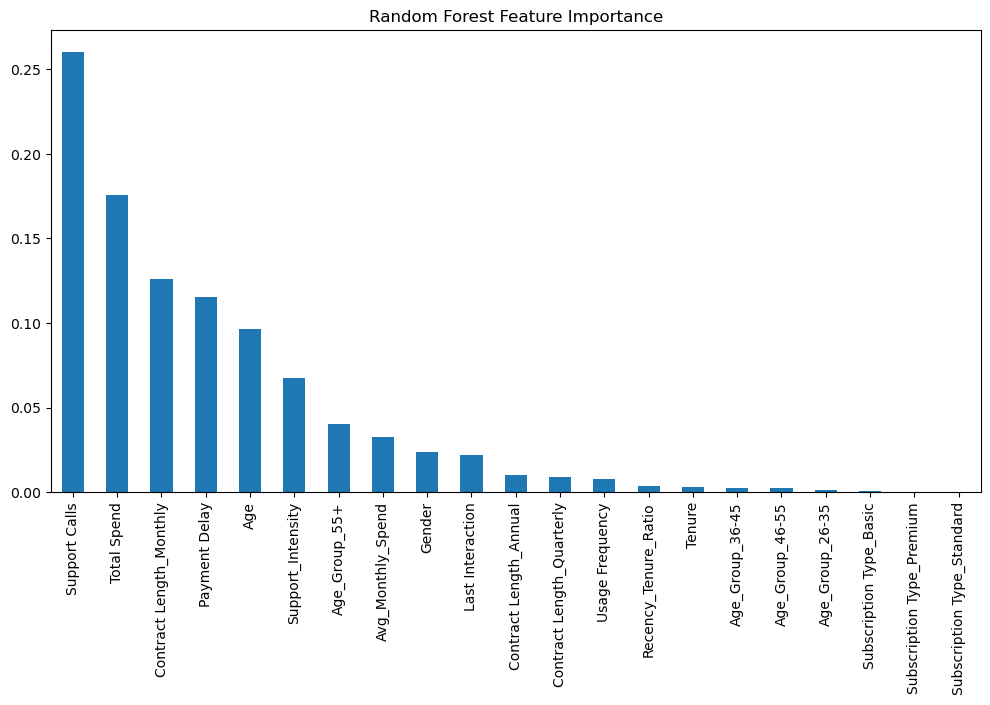

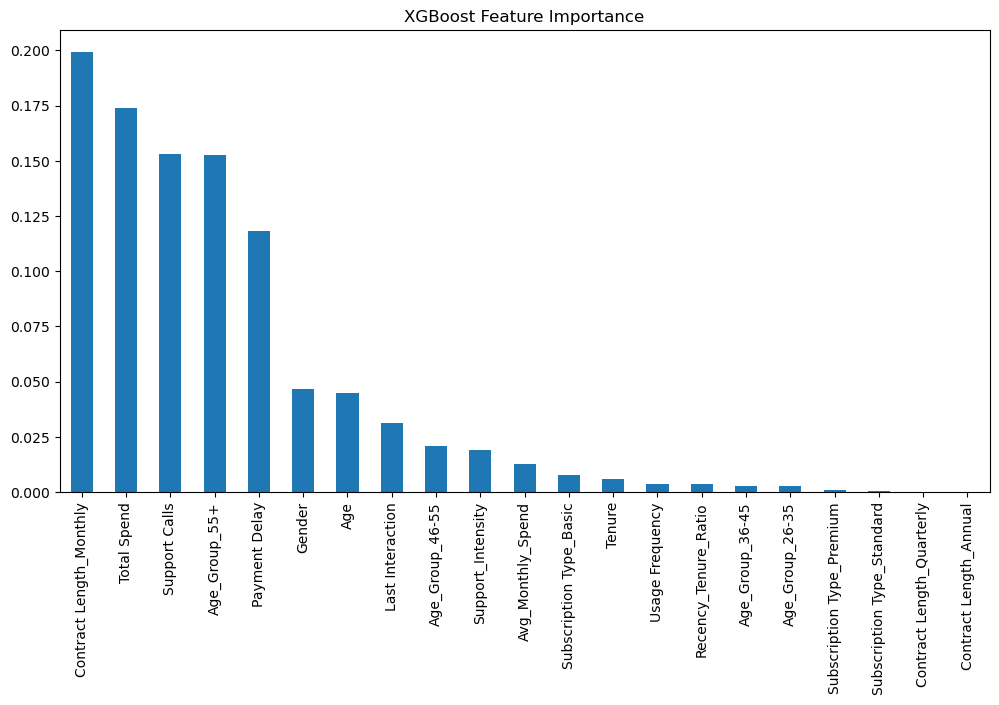

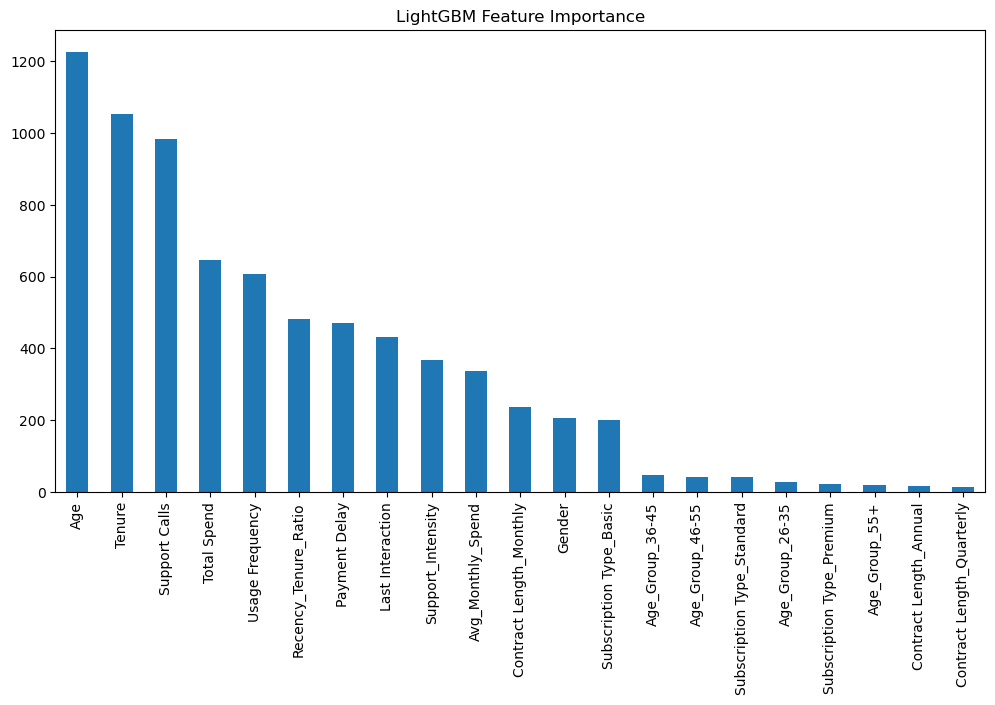

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import shap
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, accuracy_score, roc_curve

# FEATURE IMPORTANCE
# -------------------------------
def plot_feature_importance(model, X, model_name):
    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances.sort_values(ascending=False).plot(
        kind='bar', figsize=(12,6), title=f"{model_name} Feature Importance"
    )
    plt.show()

# Plot base models
plot_feature_importance(rf_model, X_train, "Random Forest")
plot_feature_importance(xgb_model, X_train, "XGBoost")
plot_feature_importance(best_lgb, X_train, "LightGBM")

